In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# import libraries 
import pickle

import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [3]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

36

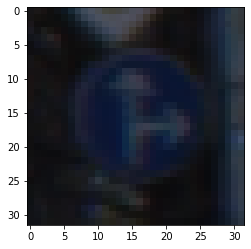

In [7]:
i = 1001
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]


In [8]:
## Shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [9]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [10]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [11]:
X_train_gray.shape

(34799, 32, 32, 1)

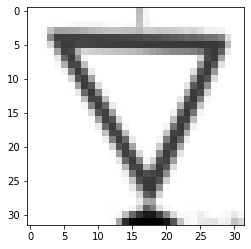

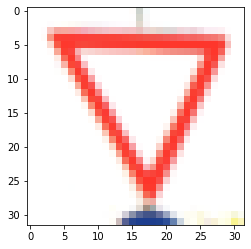

In [12]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from subprocess import check_output
from sklearn.model_selection import train_test_split

C:\Users\rasumit\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\rasumit\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\rasumit\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\rasumit\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarnin

In [14]:
image_shape = X_train_gray[i].shape

In [15]:
image_shape

(32, 32, 1)

In [16]:
cnn_model = tf.keras.Sequential()
cnn_model.add(tf.keras.layers.Conv2D(32,3, 3, input_shape = image_shape, activation='relu'))
cnn_model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(tf.keras.layers.Dropout(0.25))
cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(128, activation='relu'))
cnn_model.add(tf.keras.layers.Dropout(0.5))
cnn_model.add(tf.keras.layers.Dense(43, activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False),metrics =['accuracy'])

In [19]:
history = cnn_model.fit(X_train_gray_norm,
                       y_train,
                        batch_size=32,
                        nb_epoch=60,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/60
34799/34799 [==============================] - 8s 220us/sample - loss: 0.9689 - acc: 0.7080 - val_loss: 0.4429 - val_acc: 0.8794
Epoch 2/60
34799/34799 [==============================] - 11s 315us/sample - loss: 0.5426 - acc: 0.8336 - val_loss: 0.3446 - val_acc: 0.8995
Epoch 3/60
34799/34799 [==============================] - 12s 334us/sample - loss: 0.3984 - acc: 0.8763 - val_loss: 0.3063 - val_acc: 0.9111
Epoch 4/60
34799/34799 [==============================] - 11s 314us/sample - loss: 0.3225 - acc: 0.8999 - val_loss: 0.2626 - val_acc: 0.9209
Epoch 5/60
34799/34799 [==============================] - 11s 320us/sample - loss: 0.2718 - acc: 0.9148 - val_loss: 0.2689 - val_acc: 0.9209
Epoch 6/60
34799/34799 [==============================] - 12s 334us/sample - loss: 0.2442 - acc: 0.9241 - val_loss: 0.2224 - val_acc: 0.9363
Epoch 7/60
34799/34799 [==============================] - 12s 348us/sample - loss: 0.2199 - acc: 0.9318 - 

Epoch 58/60
34799/34799 [==============================] - 11s 327us/sample - loss: 0.0615 - acc: 0.9807 - val_loss: 0.1796 - val_acc: 0.9560
Epoch 59/60
34799/34799 [==============================] - 11s 325us/sample - loss: 0.0655 - acc: 0.9810 - val_loss: 0.1834 - val_acc: 0.9612
Epoch 60/60
34799/34799 [==============================] - 12s 337us/sample - loss: 0.0600 - acc: 0.9820 - val_loss: 0.1955 - val_acc: 0.9603


In [20]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.9487


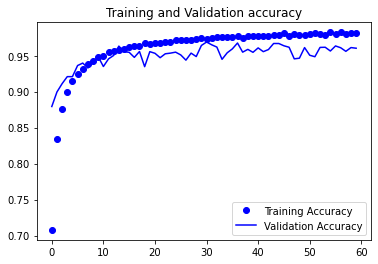

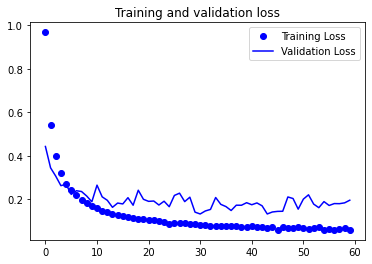

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

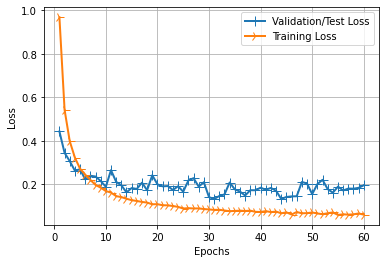

In [22]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+ 1)
line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label= 'Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker= '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

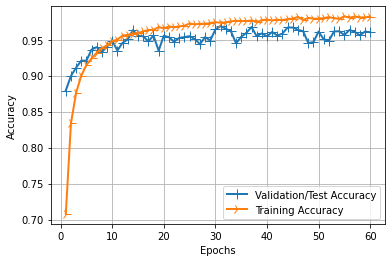

In [23]:
import matplotlib.pyplot as plt

history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values)+ 1)
line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label= 'Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker= '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [24]:
cnn_model.save("./trafficSign.h5")

In [25]:
#from keras.models import load_model
model = tf.keras.models.load_model('./trafficSign.h5')

In [26]:
from keras.utils.vis_utils import plot_model
%matplotlib inline

Using TensorFlow backend.


** Note:Perform conda install graphviz, pip install graphviz and pip install pydot then run below cell. You can also check this documentation for setup : https://www.codesofinterest.com/2017/02/visualizing-model-structures-in-keras.html . Next 3 cells are not important you can execute ande check the other cells

In [27]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

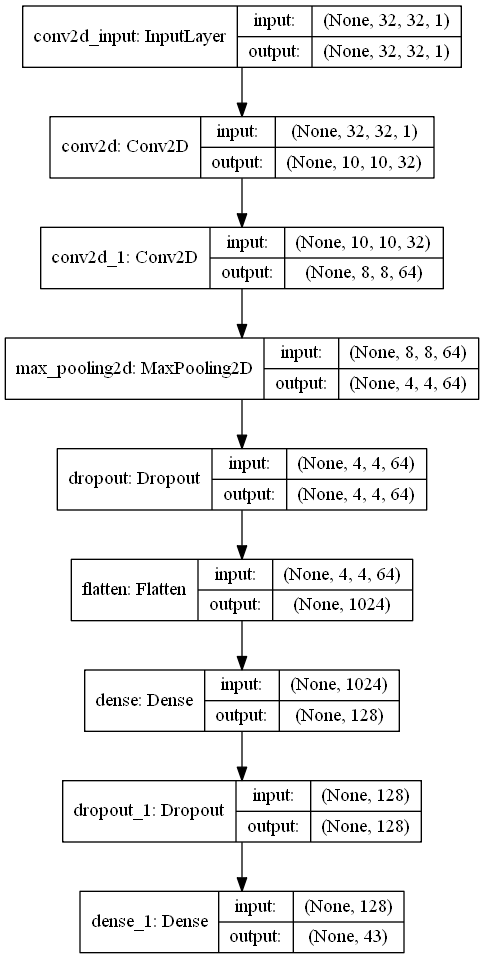

In [28]:
#Plotting the model archictecture
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [29]:
from keras.utils import plot_model
plot_model(cnn_model, to_file='model.png',
          show_shapes= True,
          show_layer_names = True)

SyntaxError: EOL while scanning string literal (<ipython-input-29-d1014c533537>, line 2)

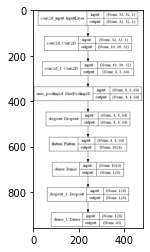

In [30]:
#Reading the model architecture image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('model.png')
plt.imshow(img)
plt.show()

In [31]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
cm

array([[ 53,   4,   0, ...,   0,   0,   0],
       [  0, 711,   2, ...,   2,   0,   0],
       [  0,  13, 730, ...,   0,   0,   0],
       ...,
       [  0,   5,   0, ...,  79,   0,   0],
       [  0,   0,   0, ...,   0,  41,   0],
       [  0,   0,   0, ...,   0,   1,  89]], dtype=int64)

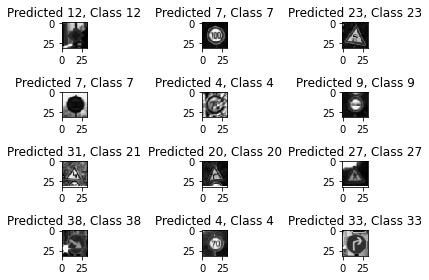

In [32]:
for i in range(0,12):
    plt.subplot(4,3,i+1)
    plt.imshow(X_test_gray_norm[i+10].squeeze(), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[i+10], y_true[i+10]))
    plt.tight_layout()

In [33]:
#Printing the classification report
from sklearn.metrics import classification_report
predictions = model.predict_classes(X_test_gray )
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.01      1.00      0.02        60
           1       0.99      0.65      0.78       720
           2       0.97      0.64      0.77       750
           3       0.93      0.10      0.17       450
           4       1.00      0.24      0.39       660
           5       0.00      0.00      0.00       630
           6       0.00      0.00      0.00       150
           7       1.00      0.01      0.01       450
           8       0.00      0.00      0.00       450
           9       1.00      0.14      0.24       480
          10       0.99      0.50      0.66       660
          11       0.96      0.71      0.82       420
          12       1.00      0.29      0.45       690
          13       1.00      0.95      0.98       720
          14       1.00      0.36      0.53       270
          15       1.00      0.00      0.01       210
          16       1.00      0.77      0.87       150
          17       1.00    

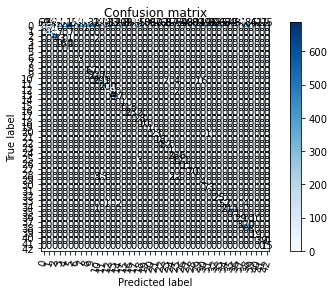

In [34]:
# Confussion matrix 
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=75) 
    plt.yticks(tick_marks, classes)
    

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = range(43)
cm = confusion_matrix(predictions,y_test)

plt.figure(2)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')